# 과제2
## taxis 데이터에 대한 탐색적 데이터 분석을 하시오
1. 데이터 적재
2. 범주형 열 2개(pickup_zone, dropoff_zone)와 수치형 열 1개(fare) 선택하여, k차원 분할표 작성
3. 그래프 3가지 이상 그려보기
4. 과제2_홍길동.ipynb 로 제출

### 1. 데이터 적재

#### 구글 드라이브 파일 연동

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 나의 루트 경로 설정
rootdir = '/content/drive/MyDrive/Colab Notebooks/통계'

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [22]:
taxis = pd.read_csv(os.path.join(rootdir, 'data', 'taxis.csv'))

### 2. 범주형 열 2개(pickup_zone, dropoff_zone)와 수치형 열 1개(fare) 선택하여, k차원 분할표 작성



In [11]:
taxis[['pickup_zone', 'dropoff_zone', 'fare']].groupby(['pickup_zone', 'dropoff_zone']).sum()

fare
pickup_zone             dropoff_zone                    
Allerton/Pelham Gardens Clinton Hill               54.16
                        Co-Op City                 10.50
Alphabet City           East Village                7.00
                        Greenwich Village North    10.00
                        Greenwich Village South     7.50
...                                                  ...
Yorkville West          Upper West Side South      26.50
                        West Chelsea/Hudson Yards  26.00
                        Williamsburg (North Side)  27.00
                        Yorkville East              4.50
                        Yorkville West             34.50

[2737 rows x 1 columns]

### 3. 그래프 3가지 이상 그려보기

In [12]:
taxis.head()

,Unnamed: 0,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [13]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6433 non-null   int64  
 1   pickup           6433 non-null   object 
 2   dropoff          6433 non-null   object 
 3   passengers       6433 non-null   int64  
 4   distance         6433 non-null   float64
 5   fare             6433 non-null   float64
 6   tip              6433 non-null   float64
 7   tolls            6433 non-null   float64
 8   total            6433 non-null   float64
 9   color            6433 non-null   object 
 10  payment          6389 non-null   object 
 11  pickup_zone      6407 non-null   object 
 12  dropoff_zone     6388 non-null   object 
 13  pickup_borough   6407 non-null   object 
 14  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 754.0+ KB


In [30]:
taxis.describe(include='object')

,pickup,dropoff,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433,6389,6407,6388,6407,6388
unique,6414,6425,2,2,194,203,4,5
top,2019-03-13 10:57:06,2019-03-04 18:08:13,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,2,2,5451,4577,230,245,5268,5206


In [14]:
taxis.isnull().sum()

Unnamed: 0          0
pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [16]:
num_taxis = taxis.select_dtypes(include = 'number')

In [21]:
num_taxis.head()

,Unnamed: 0,passengers,distance,fare,tip,tolls,total
0,0,1,1.60,7.0,2.15,0.0,12.95
1,1,1,0.79,5.0,0.00,0.0,9.30
2,2,1,1.37,7.5,2.36,0.0,14.16
3,3,1,7.70,27.0,6.15,0.0,36.95
4,4,3,2.16,9.0,1.10,0.0,13.40


In [26]:
num_taxis.describe()

,Unnamed: 0,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,3216.000000,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1857.191473,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1608.000000,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,3216.000000,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,4824.000000,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6432.000000,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [17]:
num_taxis.columns

Index(['Unnamed: 0', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total'],
      dtype='object')

In [18]:
num_taxis.corr()

,Unnamed: 0,passengers,distance,fare,tip,tolls,total
Unnamed: 0,1.000000,-0.056183,0.034017,0.030036,-0.127919,-0.013578,-0.032786
passengers,-0.056183,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708
distance,0.034017,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676
fare,0.030036,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358
tip,-0.127919,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186
tolls,-0.013578,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142
total,-0.032786,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000


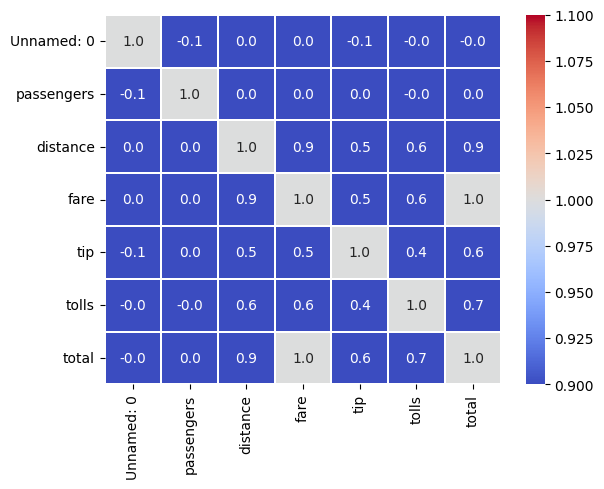

In [20]:
# 수치형 데이터의 상관계수
corr = num_taxis.corr()                        # 상관행렬표 만들기
sns.heatmap(round(corr, 1),
            annot = True,                     # 상관계수 표시
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = 1.0,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                # 셀 간격
sns.set(rc={'figure.figsize' : (10,7)})       # 그래프 그리기

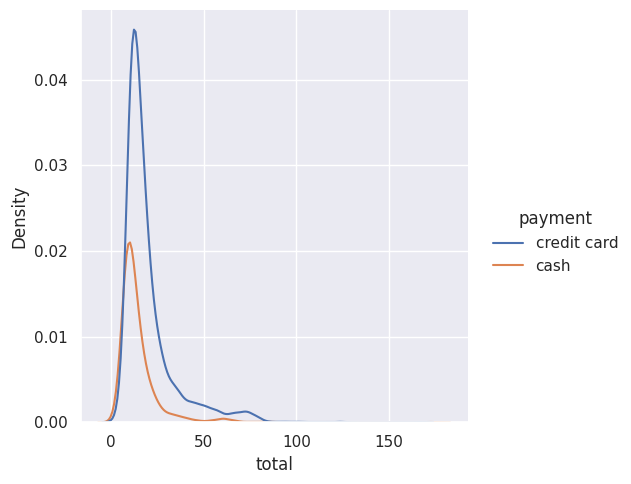

In [31]:
# 기본 그래프
# 결재방법(현금, 카드)에 따른 금액별 결재 비율
sns.displot(taxis, x = 'total', kind = 'kde', hue = 'payment')

In [32]:
taxis['pickup_borough'].unique()

array(['Manhattan', 'Queens', nan, 'Bronx', 'Brooklyn'], dtype=object)

In [33]:
taxis['dropoff_borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', nan, 'Bronx', 'Staten Island'],
      dtype=object)

<Axes: xlabel='pickup_borough', ylabel='total'>

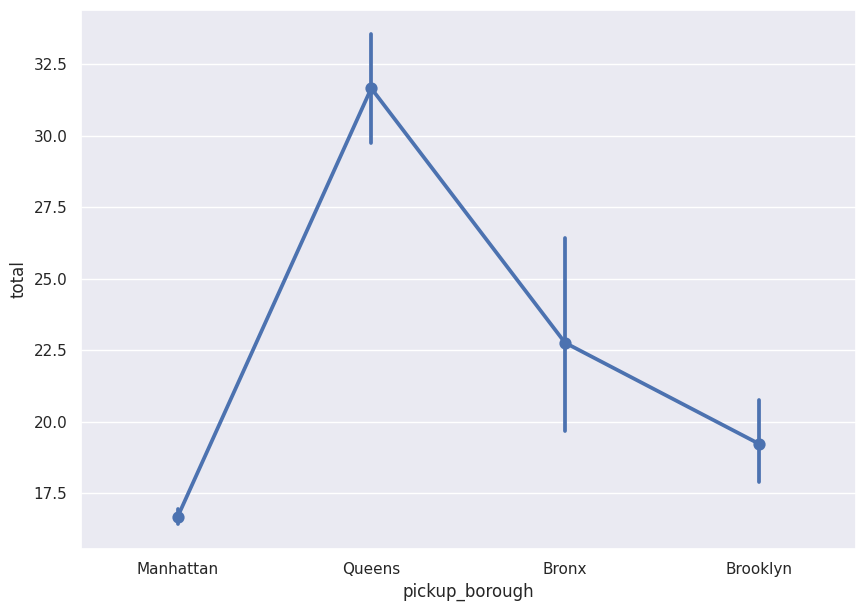

In [34]:
# pickup위치(pickup_borough)에 따른 금액(total)
sns.pointplot(x = 'pickup_borough', y = 'total', data = taxis)

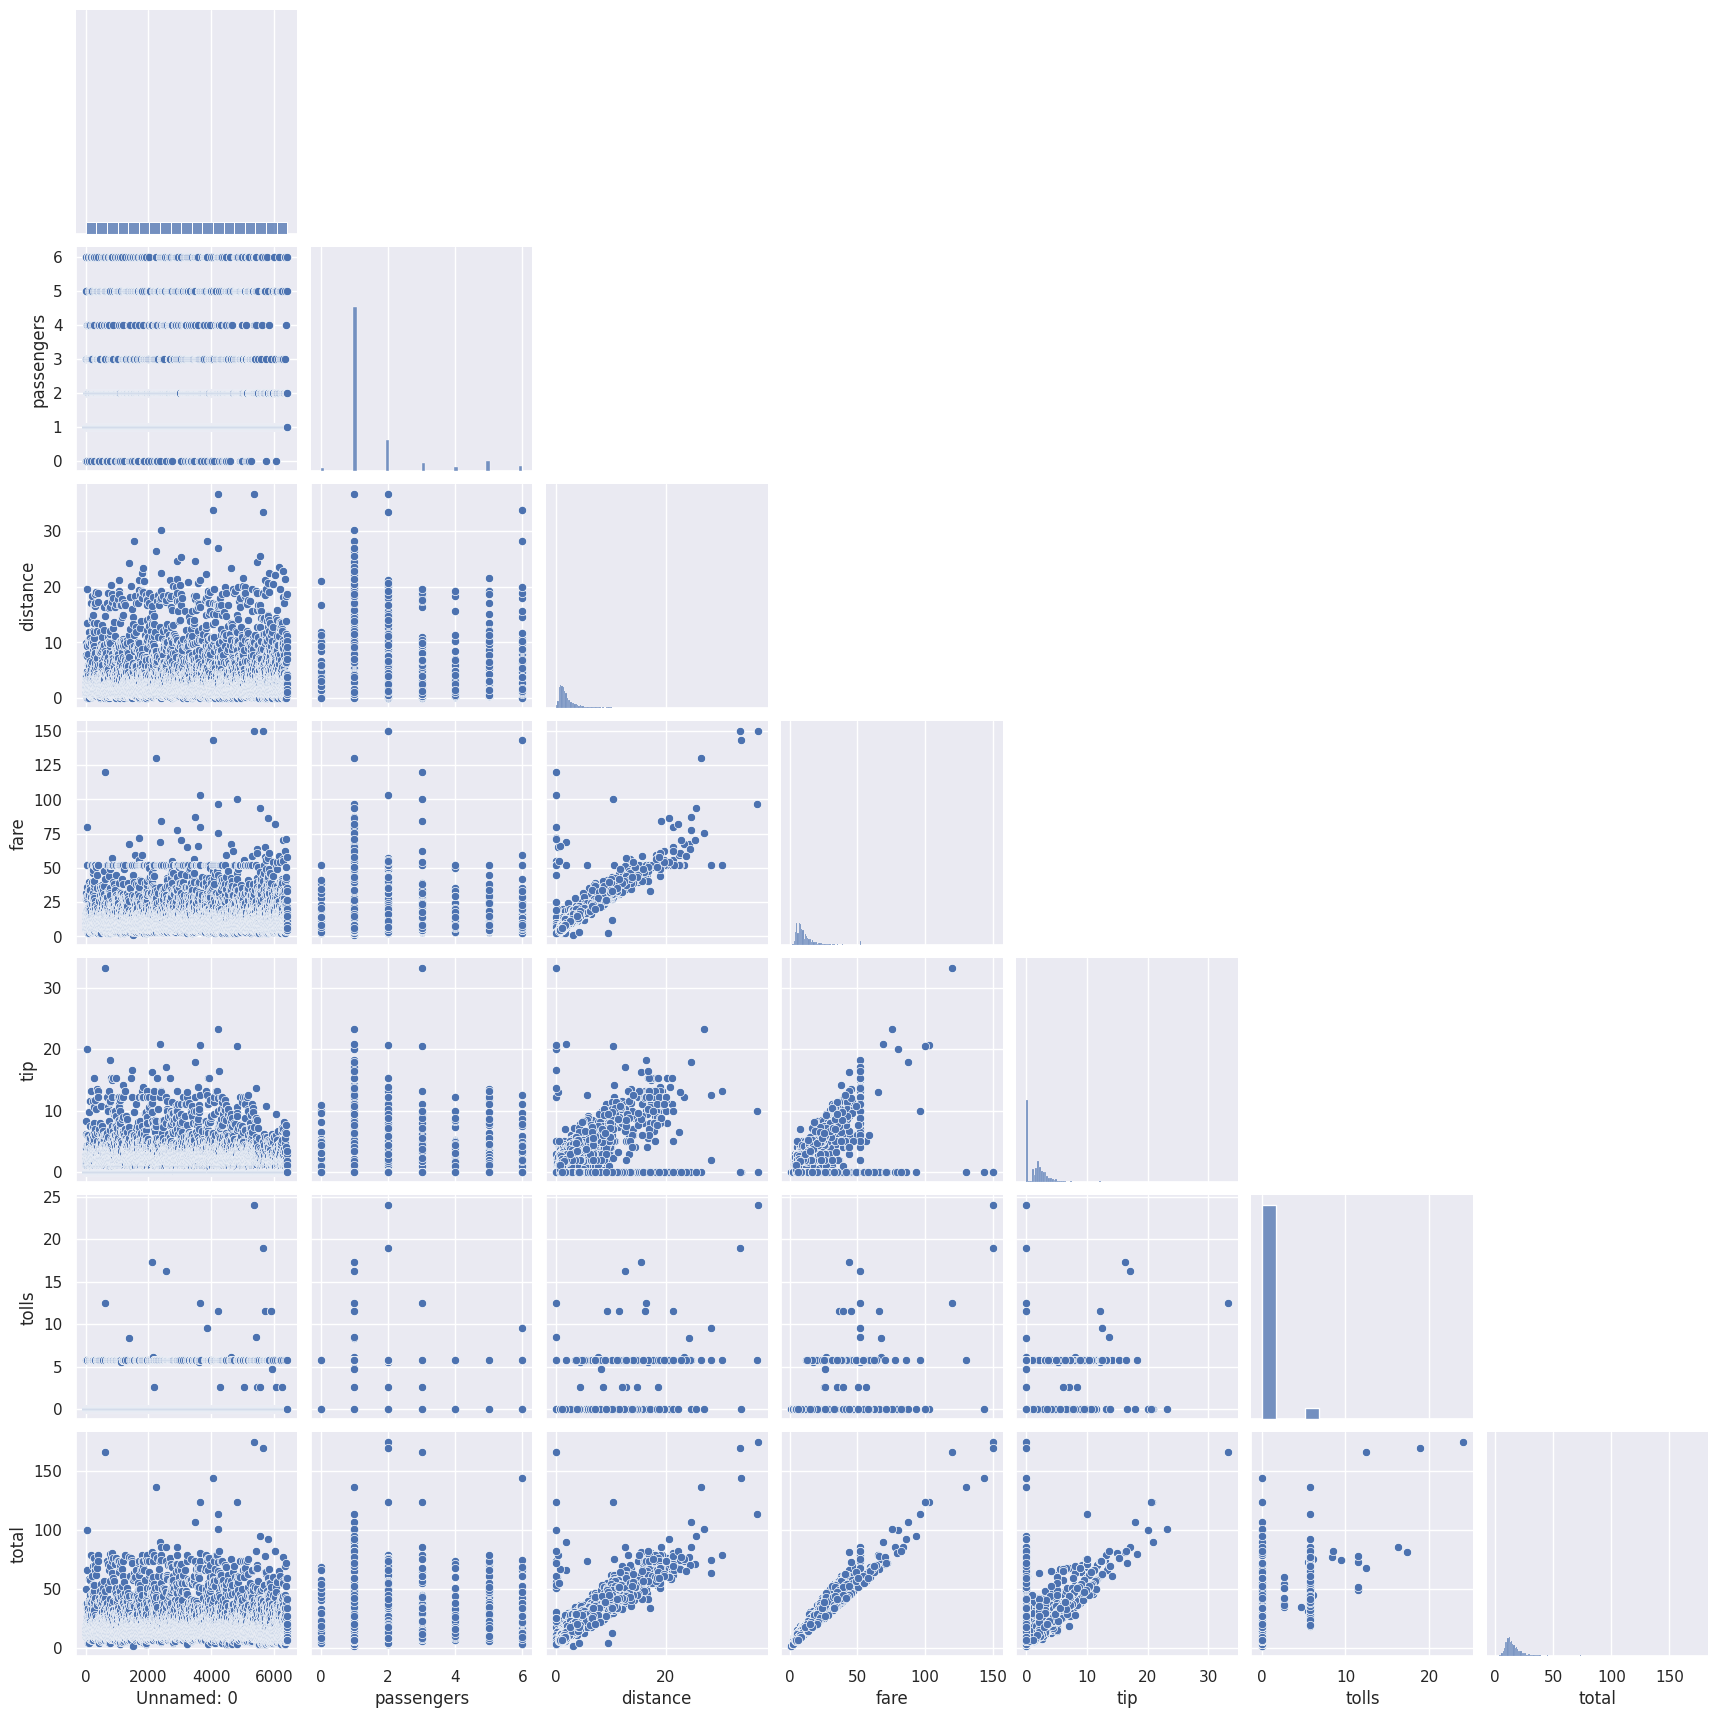

In [39]:
# 모든 수치형 데이터의 산점도 행렬 (절반만 그리기)
sns.pairplot(num_taxis, corner = True)

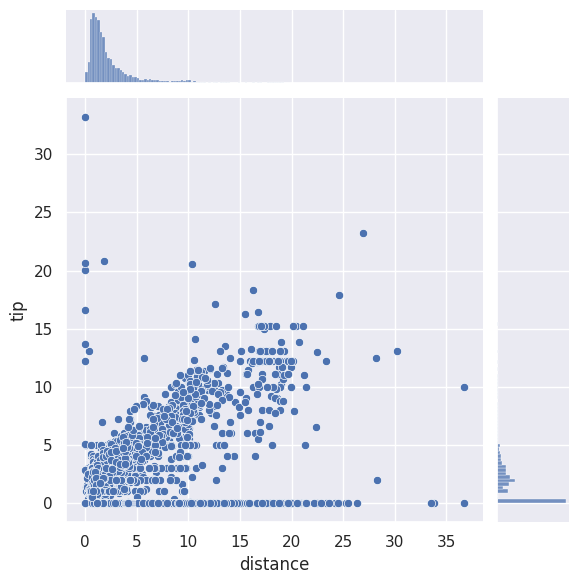

In [40]:
# 거리(distance) 와 팁(tip)의 상관관계
# 2차원 - 산점도 + 히스토그램
sns.jointplot(data = num_taxis, x = 'distance', y = 'tip')

In [43]:
taxis.head(2)

,Unnamed: 0,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


In [44]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6433 non-null   int64  
 1   pickup           6433 non-null   object 
 2   dropoff          6433 non-null   object 
 3   passengers       6433 non-null   int64  
 4   distance         6433 non-null   float64
 5   fare             6433 non-null   float64
 6   tip              6433 non-null   float64
 7   tolls            6433 non-null   float64
 8   total            6433 non-null   float64
 9   color            6433 non-null   object 
 10  payment          6389 non-null   object 
 11  pickup_zone      6407 non-null   object 
 12  dropoff_zone     6388 non-null   object 
 13  pickup_borough   6407 non-null   object 
 14  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 754.0+ KB


In [45]:
taxis['pickup_dt'] = pd.to_datetime(taxis['pickup'])

In [46]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       6433 non-null   int64         
 1   pickup           6433 non-null   object        
 2   dropoff          6433 non-null   object        
 3   passengers       6433 non-null   int64         
 4   distance         6433 non-null   float64       
 5   fare             6433 non-null   float64       
 6   tip              6433 non-null   float64       
 7   tolls            6433 non-null   float64       
 8   total            6433 non-null   float64       
 9   color            6433 non-null   object        
 10  payment          6389 non-null   object        
 11  pickup_zone      6407 non-null   object        
 12  dropoff_zone     6388 non-null   object        
 13  pickup_borough   6407 non-null   object        
 14  dropoff_borough  6388 non-null   object 

In [49]:
taxis['pickup_dt_hour'] = taxis['pickup_dt'].dt.hour

In [50]:
taxis.head()

,Unnamed: 0,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_dt,pickup_dt_hour
0,0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23 20:21:09,20
1,1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04 16:11:55,16
2,2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27 17:53:01,17
3,3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10 01:23:59,1
4,4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30 13:27:42,13


In [51]:
taxis['pickup_dt_hour'].unique()

array([20, 16, 17,  1, 13, 10, 21, 12, 11, 19,  7,  6, 22,  3, 23,  9,  8,
        2, 15, 18,  5, 14,  0,  4], dtype=int32)

In [52]:
taxis['pickup_dt_hour'].nunique()

24

<Axes: xlabel='pickup_dt_hour', ylabel='total'>

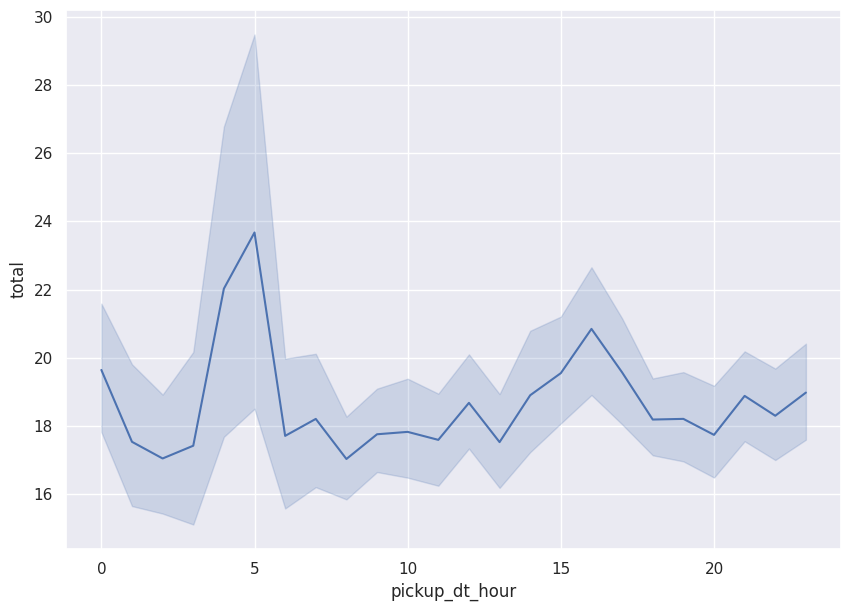

In [53]:
# pickup 시간별 결제금액
sns.lineplot(data = taxis, x = 'pickup_dt_hour', y = 'total')